# Numerically Summarizing Data:
- Measure of Central Tendency
- Mean: sum of all values of a variable / number of observaions
- Median: middle number in ascending sorted data (if number of observations is evenr, take a mean of 2 middle numbers)
    - In presence of outlier, Median is a better metric than Mean
- Mode: most frequent observation of the variable in the dataset

### Measuring Mean and Median

In [1]:
x <- 1:11
name <- c('one', 'two', 'three', 'fout', 'five','six', 'seven', 'eight', 'nine', 'ten', 'eleven')
score <- c(82,77,90,71,62,68,74,84,94,88,96)
 
data <- data.frame(x, name, score)
data

x,name,score
1,one,82
2,two,77
3,three,90
4,fout,71
5,five,62
6,six,68
7,seven,74
8,eight,84
9,nine,94
10,ten,88


In [2]:
mean(data$score)
median(data[['score']])

[1] 80.54545

[1] 82

### Creating a function to measure Mode

In [3]:
data <- c(0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,3)

#Get Vector of unique numbers from data
ux <- unique(data)
ux

[1] 0 1 2 3

In [4]:
#returns a vector of the positions of (first) matches of its first argument in its second
match(data, ux)

[1] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 4

In [5]:
#tabulate is similar to table but only generates the counts
tabulate(match(data, ux))

[1] 11  4  1  1

In [6]:
#which.max: Determines the location (index) of the (first) minimum or maximum of a numeric (or logical) vector
which.max(tabulate(match(data, ux)))

[1] 1

In [7]:
#Select that location from unique vector
ux[which.max(tabulate(match(data, ux)))]

[1] 0

#### Create function:

In [8]:
getMode <- function(x){
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
 
getMode(data)

[1] 0

## Measure of Dispersion:
- Range:
    - The, Range, R, of a variable is the difference between the largest data value and the smallest data value
    - *Range = R = largest data value - smallest data value*
- Variance:
    - The variance measures how far each number in the set is from the mean. Variance is calculated by taking the differences between each number in the set and the mean, squaring the differences (to make them positive) and dividing the sum of the squares by the number of values in the set
    - Variance of Sample:  Is the sum of the squared deviations about the sample mean divided by the number of observations in the sample minus 1
 
- Standard Deviation:
    - A population standard deviation is obtained by taking the square root of the population variance
    - A sample standard deviation is obtained by taking the square root of the sample variance
    - A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out
- Coefficient of Variation (CV):
    - Coefficient of Variation (CV) measures the scatter in the data relative to mean
    - Always expressed as percentage

#### Sample Data Frame:

In [9]:
x <- 1:11
name <- c('one', 'two', 'three', 'fout', 'five','six', 'seven', 'eight', 'nine', 'ten', 'eleven')
score <- c(82,77,90,71,62,68,74,84,94,88,96)
 
data <- data.frame(x, name, score)
data

x,name,score
1,one,82
2,two,77
3,three,90
4,fout,71
5,five,62
6,six,68
7,seven,74
8,eight,84
9,nine,94
10,ten,88


#### Measuring Range

In [10]:
#Find Range
range(data$score)
r <- max(data$score) - min(data$score)
r

[1] 62 96

[1] 34

#### Measuring Variance

In [11]:
#Variance
v.sample <- var(data$score)
v.sample

[1] 122.6727

#### Measuring variance of a Sample and Population manually:

In [12]:
#Variance of Sample Manually
n <- length(data$score)
x <- data$score
v.sample <- sum((x - mean(x))^2)/(n-1)
v.sample
 
#Variance of Population Manually
n <- length(data$score)
x <- data$score
v.population <- sum((x - mean(x))^2)/(n)
v.population

[1] 122.6727

[1] 111.5207

#### Measuring SD:

In [13]:
#Standard Deviation
sd.sample <- sd(data$score)
sd.sample

[1] 11.07577

#### Measuring SD of a Sample and Population manually:

In [14]:
#SD of Sample Manually:
sd.sample <- sqrt(v.sample)
sd.sample
 
#SD of Population Manually:
sd.population <- sqrt(v.population)
sd.population

[1] 11.07577

[1] 10.56033

# Empirical Rule:
- In a normal distribution (Bell Shape Curve), nearly all of the data will fall within three standard deviations of the mean. The empirical rule can be broken down into three parts:
    - 68% of data falls within the first standard deviation from the mean.
    - 95% fall within two standard deviations.
    - 99.7% fall within three standard deviations.
    - 34% + 13.5% + 2.35% + 0.15% = 50%

## Standardized values: z-value
- z = (y - u) / q = (Data Value - Mean) / SD
- Compute probability
- If z = 2, data value is 2 standard deviation above the mean
- If z = -2, data value is 2 standard deviation below the mean

#### Create a Data Frame

In [15]:
#Create Data Frame
x <- 1:11
name <- c('one', 'two', 'three', 'fout', 'five','six', 'seven', 'eight', 'nine', 'ten', 'eleven')
score <- c(82,77,90,71,62,68,74,84,94,88,96)

data <- data.frame(x, name, score)
data

x,name,score
1,one,82
2,two,77
3,three,90
4,fout,71
5,five,62
6,six,68
7,seven,74
8,eight,84
9,nine,94
10,ten,88


#### Calculate the z-value of each element based on the Mean and SD

In [16]:
#Calculate Mean of the scores
mean.sample <- mean(data$score)
mean.sample

#Calculate SD of the scores
sd.sample <- sd(data$score)
sd.sample

#Calculate z-score of each element based on Mean and SD
z.score <- (data$score - mean.sample)/sd.sample
print(z.score)

[1] 80.54545

[1] 11.07577

 [1]  0.1313268 -0.3201090  0.8536241 -0.8618320 -1.6744164 -1.1326935
 [7] -0.5909705  0.3119011  1.2147727  0.6730497  1.3953470


## p-value:
- Represents the area under the normal distribution curve to the left side
- Add up all of the percentages up to the z-score

| z-score | p-value |
| --------|:--------|
| 3       |0.9987   |
| 2       |0.9772   |
| 1       |0.8413   |
| 0       |0.5000   |
| -1      |0.1587   |
| -2      |0.0228   |
| -3      |0.0013   |

### Example of calculating p-value:
- Probability of score between 450 and 600 with Mean = 500 and SD = 100
- Calculate z-score of the right (maximum) range:
    - z-score = (600 - 500) / 100 = 1.00      p-value( z < 1.00 ) = 0.8413 = 84.13% (0.15+2.35+13.5+34+34)
- Calculate z-score of the left (minimum) range:
    - z-score = (450 - 500) / 100 =  -0.50    p-value( z < -0.50 ) = 0.3085 = 30.85%
- Probability = 0.8413 – 0.3085 = 0.5328 = 53.28%

### Standard Normal curve:
- Mean = Median = Mode
- Mean = 0, SD = 1
- Area under the curve = 1
- Area of the left side = Area of the right side

### Example: Calculating z-score and p-value

In [17]:
m <- 100
sd <- 15
data <- 110

#### Calculate z-score manually

In [18]:
zValue <- (data - m)/sd
zValue

[1] 0.6666667

#### Calculate z-score using scale() function.  Returns a Matrix

In [19]:
zValue2 <- scale(data, m, sd)
print(zValue2)

#Index to just get the z-score
zValue2[1]

          [,1]
[1,] 0.6666667
attr(,"scaled:center")
[1] 100
attr(,"scaled:scale")
[1] 15


[1] 0.6666667

#### Get p-value from z-score

In [20]:
z <- 0.21
pValue <- pnorm(z)
pValue
 
#Get the "right" side area
1 - pnorm(z)

[1] 0.5831662

[1] 0.4168338

#### Get the probability between 2 z scores

In [21]:
z1 <- -0.31
z2 <- 0.31
probability <- pnorm(z2) - pnorm(z1)
probability

[1] 0.243439

#### Get z-score from p-value

In [22]:
pValue <- 0.58
zValue <- qnorm(pValue)
zValue

[1] 0.2018935

## Skewness
- Mean < Median: Negative or left skewed distribution
- Mean = Median: Symmetrical distribution with zero skewness
- Mean > Median: Positive or right skewed distribution


## Quartile
- The quartiles divide the data into 4 equal parts
- First quartile: Q1
    - Bottom 25% = 25 percentile
    - Top 75%
- Second quartile: Q2
    - Bottom 50% = 50 percentile
    - Top 50%
- Third quartile: Q3
    - Bottom 75% = 75 percentile
    - Top 25%


### Example: Five Number Summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.95   26.28   30.95   32.89   37.05   54.63 

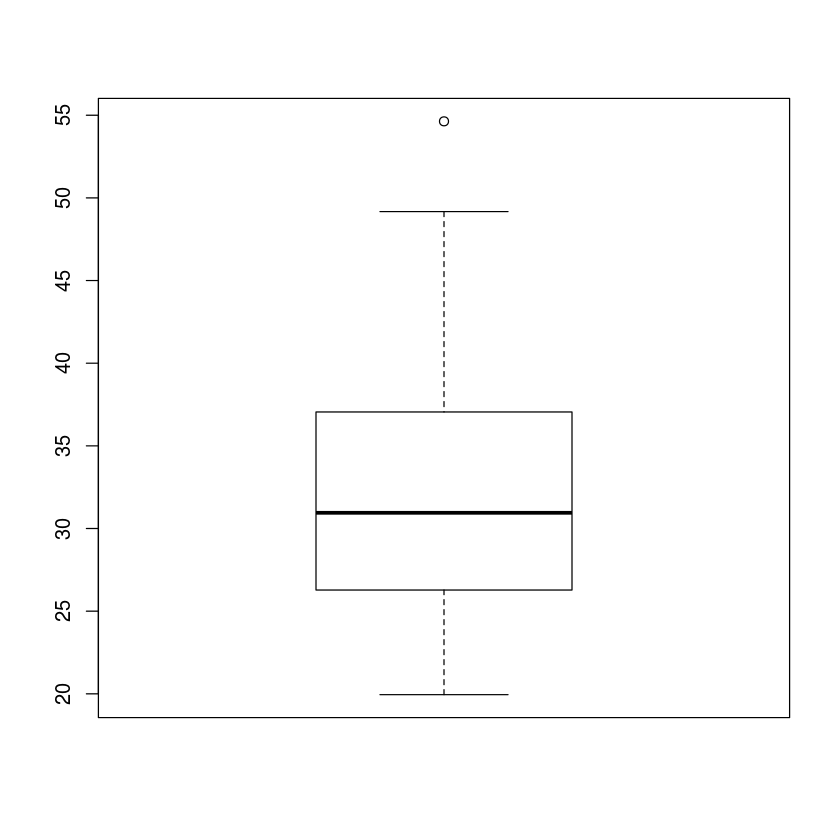

In [23]:
rawDataCol1.4 = c(19.95, 28.58, 33.23, 23.25, 28.72,33.53, 23.32, 30.18, 36.68, 25.55, 30.35, 37.05)
rawDataCol5.7 = c(25.83, 30.95, 37.43, 26.28, 32.13,41.42, 42.47, 49.17, 54.63)
 
rawData = c(rawDataCol1.4, rawDataCol5.7)
 
summary(rawData)
 
boxplot(rawData)

## Data Standardization and Scaling
- Standardization: Based on z-score
    - From -3 to +3
    - z = (Data Value – Mean) / SD
- Normalization (Scaling):
    - y = (Data Value – Min Value) / (Max Value – Min Value)
- In the presence of outliers, Normalization is better

### Example: Normaize Data

In [24]:
rawDataCol1.4 = c(19.95, 28.58, 33.23, 23.25, 28.72,33.53, 23.32, 30.18, 36.68, 25.55, 30.35, 37.05)
rawDataCol5.7 = c(25.83, 30.95, 37.43, 26.28, 32.13,41.42, 42.47, 49.17, 54.63)
 
rawData = c(rawDataCol1.4, rawDataCol5.7)
 
normRawData <- (rawData - min(rawData)) / (max(rawData) - min(rawData))
normRawData

[1] 0.00000000 0.24884660 0.38292964 0.09515571 0.25288351 0.39158016
 [7] 0.09717416 0.29498270 0.48241061 0.16147636 0.29988466 0.49307958
[13] 0.16955017 0.31718570 0.50403691 0.18252595 0.35121107 0.61908881
[19] 0.64936563 0.84256055 1.00000000